In [0]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoded_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoded_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train, x_test
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.3610 - val_loss: 0.2709
Epoch 2/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2632 - val_loss: 0.2517
Epoch 3/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2424 - val_loss: 0.2308
Epoch 4/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2234 - val_loss: 0.2132
Epoch 5/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.2078 - val_loss: 0.1995
Epoch 6/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1956 - val_loss: 0.1888
Epoch 7/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1861 - val_loss: 0.1805
Epoch 8/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.1786 - val_loss: 0.1739
Epoch 9/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1726 - val_loss: 0.1683
Epoch

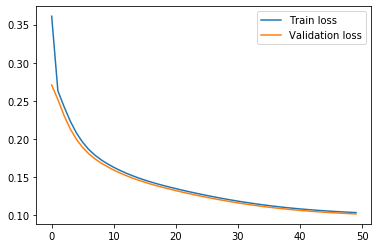

In [22]:
import matplotlib.pyplot as plt

output = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

plt.plot(output.history['loss'], label='Train loss')
plt.plot(output.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

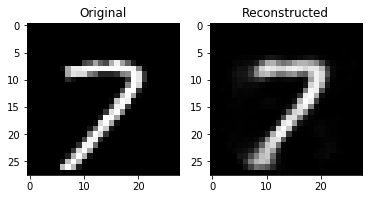

Generate another? (y/n)y


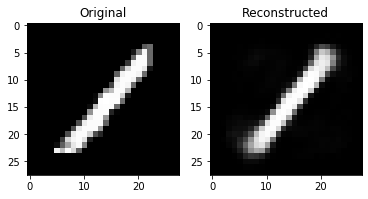

Generate another? (y/n)y


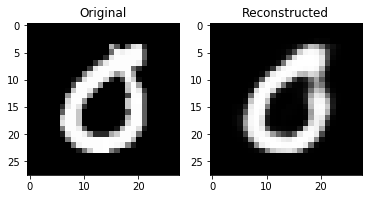

Generate another? (y/n)n


In [23]:
done = False
while not done:
    i = np.random.choice(len(x_test))
    x = x_test[i]
    y = decoder.predict(encoder.predict(x.reshape(1,784)))
    plt.subplot(1, 2, 1)
    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.title('Original')
    
    plt.subplot(1, 2, 2)
    plt.imshow(y.reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')

    plt.show()

    ans = input("Generate another? (y/n)")
    if ans and ans[0] in ('n' or 'N'):
        done = True